<a href="https://colab.research.google.com/github/chang-ho-jeon/test_analysis/blob/main/apt_price_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- 데이터: [KB부동산 데이터 허브](https://data.kbland.kr/) → KB 통계 → 주택가격동향조사
    - [주간 아파트 매매가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptSalePriceInx) 전체('24년 10월 7일 기준)
    - [주간 아파트 전세가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptRentPriceInx) 전체('24년 10월 7일 기준)

- 가격지수: 기준시점(22년 1월 10일) 대비 조사 시점(24년 10월)의 가격 비율 (주택별·지역별 가중)

# 환경설정

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [11]:
import os
os.getcwd()

'/content'

# 데이터 불러오기
두 개의 엑셀파일을 읽어와서 각각 `df_sale`, `df_rent` 변수에 할당하고, shape을 확인

In [13]:
# 코드를 작성하시오
import pandas as pd

df_sale = pd.read_excel('/content/주간 아파트 매매가격지수_20241018.xlsx')
df_rent = pd.read_excel('/content/주간 아파트 전세가격지수_20241018.xlsx')
df_sale.shape, df_rent.shape

((278, 833), (278, 833))

In [14]:
df_sale.head()

,지역명,2008-04-07 00:00:52,2008-04-14 00:00:52,2008-04-21 00:00:52,2008-04-28 00:00:52,2008-05-05 00:00:52,2008-05-12 00:00:52,2008-05-19 00:00:52,2008-05-26 00:00:52,2008-06-02 00:00:52,...,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52
0,전국,58.012546,58.088746,58.197535,58.281398,58.355038,58.427476,58.493162,58.553072,58.616457,...,89.360992,89.405868,89.439824,89.486678,89.530720,89.566492,89.596423,89.615430,89.641072,89.660654
1,서울,59.733068,59.88161,60.042211,60.163088,60.278446,60.387011,60.458109,60.525847,60.595353,...,91.319067,91.555361,91.783405,92.008437,92.208397,92.354427,92.520904,92.603639,92.700462,92.815979
2,강북14개구,59.738949,59.980174,60.250467,60.443754,60.625386,60.795838,60.908856,61.036939,61.155861,...,88.495919,88.664465,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905,89.579069
3,종로구,68.904068,69.003505,69.014767,69.06011,69.06011,69.019522,69.019522,69.060926,69.101609,...,98.687133,98.810194,98.870809,99.008700,99.156805,99.250936,99.319963,99.304188,99.310792,99.308945
4,중구,66.375784,66.420175,66.554633,66.66407,66.709373,66.709373,66.709373,66.709373,66.709373,...,94.174342,94.372539,94.747151,94.884112,95.088102,95.561633,95.700824,95.731491,95.852437,95.935588


## 데이터 구조 변경
 - 컬럼은 지역명, 인덱스는 시간 정보
 - 서울 지역만 필터링
 - 집계 데이터(예. 전국, 서울, 강북14개구 등)는 제외
 - 구조 변경 결과 shape: (831, 25)
 - 변경된 데이터는 신규 변수 `df_sale_seoul`와 `df_rent_seoul`에 할당

 (예시)


 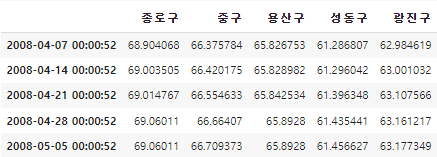

In [15]:
# 코드를 작성하시오
# 지역명 컬럼을 인덱스로 설정
df_sale = df_sale.set_index('지역명')

In [16]:
# 인덱스의 이름을 초기화
df_sale.index.name = None

In [17]:
# transpose
df_sale = df_sale.T

In [18]:
df_sale = df_sale.iloc[:, 3:29].drop('강남11개구', axis=1)

In [19]:
df_rent = df_rent.set_index('지역명')
df_rent.index.name = None
df_rent = df_rent.T
df_rent = df_rent.iloc[:, 3:29].drop('강남11개구', axis=1)

In [20]:
df_sale.shape, df_rent.shape

((832, 25), (832, 25))

## Long Form으로 변경
- `지역명`이 값으로 할당되도록 데이터 구조 변경
- 최종 구조 변경된 컬럼은 `지역명`, `매매가격지수`의 컬럼을 가지고 있음(전세 데이터는 `지역명`, `전세가격지수`의 컬럼을 가지고 있음)
- 변경한 데이터는 각각 `df_sale_seoul_long`, `df_rent_seoul_long` 에 할당
- 변경된 데이터의 shape: (20775, 2)

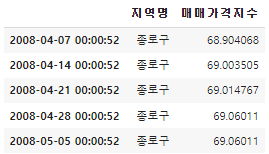

In [21]:
df_sale.head(1)

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2008-04-07 00:00:52,68.904068,66.375784,65.826753,61.286807,62.984619,60.259456,61.849069,57.838799,63.503173,61.965388,...,61.050701,55.791275,60.800721,54.170221,58.258467,62.19232,61.696444,62.208806,61.791658,62.468863


In [22]:
# 코드를 작성하시오
df_sale_seoul_long = df_sale.unstack().reset_index(level=0).copy()
df_sale_seoul_long.columns = ['지역명', '매매가격지수']
df_sale_seoul_long.head()

,지역명,매매가격지수
2008-04-07 00:00:52,종로구,68.904068
2008-04-14 00:00:52,종로구,69.003505
2008-04-21 00:00:52,종로구,69.014767
2008-04-28 00:00:52,종로구,69.06011
2008-05-05 00:00:52,종로구,69.06011


In [23]:
df_rent_seoul_long = df_rent.unstack().reset_index(level=0).copy()
df_rent_seoul_long.columns = ['지역명', '전세가격지수']
df_rent_seoul_long.head()

,지역명,전세가격지수
2008-04-07 00:00:52,종로구,54.168566
2008-04-14 00:00:52,종로구,54.238522
2008-04-21 00:00:52,종로구,54.238522
2008-04-28 00:00:52,종로구,54.238522
2008-05-05 00:00:52,종로구,54.268338


In [24]:
df_sale_seoul_long.shape, df_rent_seoul_long.shape

((20800, 2), (20800, 2))

# 데이터 시각화
- 전처리가 수행된 데이터 프레임  `df_sale_seoul`와 `df_rent_seoul` 또는 `df_sale_seoul_long`, `df_rent_seoul_long`을 사용하여 데이터 시각화 수행
- (예시)
    - `강남구`의 날짜별 `매매가격지수`, `전세가격지수` 시각화
    - `강남구`의 `매매가격지수`, `전세가격지수` 상관관계 시각화
    - `매매가격지수`와 `전세가격지수`의 차이가 가장 큰(적은) 지역을 판단하고, 해당 지역에 가격지수를 시각화
    - 연도별 데이터 집계하여 시각화 등
    
- 필요 시 추가 데이터 전처리 수행    

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트(나눔고딕)을 기본 폰트로 사용하도록 설정
plt.rcParams["font.family"] = 'NanumGothic'

# 그래프에서 마이너스 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

### 강남구의 날짜별 매매가격지수, 전세가격지수 시각화

In [26]:
# index 데이터의 자료형을 날짜 형식으로 변경
df_sale.index = pd.to_datetime(df_sale.index)
df_rent.index = pd.to_datetime(df_rent.index)

In [27]:
df_sale.index

DatetimeIndex(['2008-04-07 00:00:52', '2008-04-14 00:00:52',
               '2008-04-21 00:00:52', '2008-04-28 00:00:52',
               '2008-05-05 00:00:52', '2008-05-12 00:00:52',
               '2008-05-19 00:00:52', '2008-05-26 00:00:52',
               '2008-06-02 00:00:52', '2008-06-09 00:00:52',
               ...
               '2024-08-05 00:00:52', '2024-08-12 00:00:52',
               '2024-08-19 00:00:52', '2024-08-26 00:00:52',
               '2024-09-02 00:00:52', '2024-09-09 00:00:52',
               '2024-09-23 00:00:52', '2024-09-30 00:00:52',
               '2024-10-07 00:00:52', '2024-10-14 00:00:52'],
              dtype='datetime64[ns]', length=832, freq=None)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

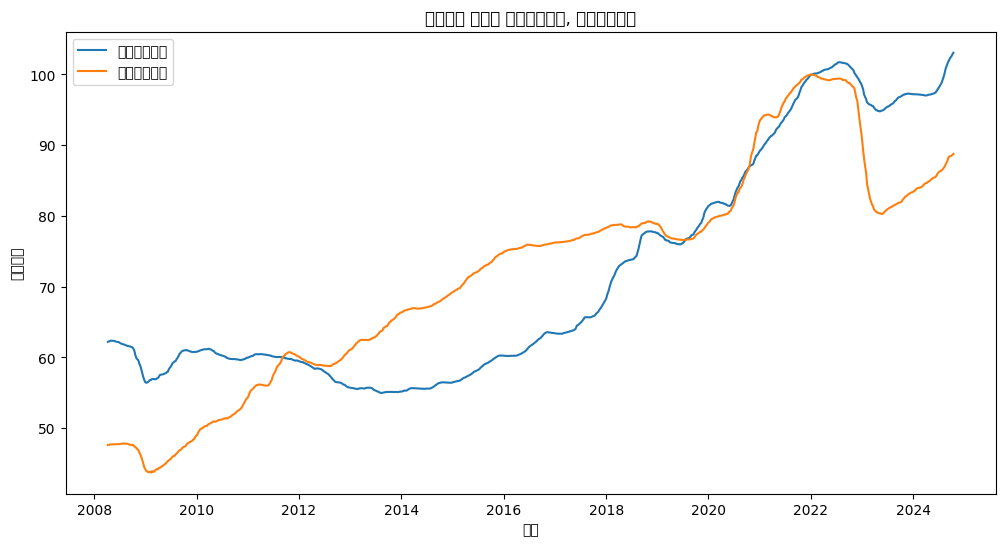

In [28]:
# 코드를 작성하시오
# df_sale와 df_rent 또는 df_sale_seoul_long, df_rent_seoul_long
# df_sale['강남구'].plot()

# figure size 설정
plt.figure(figsize=(12, 6))
# lineplot
plt.plot(df_sale['강남구'], label='매매가격지수')
plt.plot(df_rent['강남구'], label='전세가격지수')
plt.title('강남구의 날짜별 매매가격지수, 전세가격지수')
plt.xlabel('날짜')
plt.ylabel('가격지수')
plt.legend()
plt.show()

### 강남구의 매매가격지수, 전세가격지수 상관관계 시각화

In [ ]:
# 코드를 작성하시오

# 강남구의 매매가격지수 데이터와 강남구의 전세가격지수 데이터를 concat
df_kangnam = pd.concat([df_sale['강남구'], df_rent['강남구']], axis=1)
df_kangnam.columns = ['매매가격지수', '전세가격지수']
df_kangnam.head()

In [ ]:
# 두 데이터의 상관관계를 시각화하기위해 scatterplot으로 시각화
sns.scatterplot(data=df_kangnam, x='매매가격지수', y='전세가격지수')

In [ ]:
plt.scatter(df_sale['강남구'], df_rent['강남구'])
plt.xlabel('매매가격지수')
plt.ylabel('전세가격지수')
plt.show()

### 매매가격지수와 전세가격지수의 차이가 가장 큰(or 적은) 지역을 판단하고, 해당 지역에 가격지수를 시각화

In [ ]:
# 코드를 작성하시오
df_sale_seoul_long#, df_rent_seoul_long
df_sale_seoul_long['전세가격지수'] = df_rent_seoul_long['전세가격지수']
df_sale_seoul_long['diff'] = abs(df_sale_seoul_long['매매가격지수'] - df_sale_seoul_long['전세가격지수'])
df_sale_seoul_long.head(2)

In [ ]:
# 차이(diff)가 가장 큰 값
df_sale_seoul_long.sort_values(by='diff', ascending=False).head(1)

In [ ]:
# 차이(diff)가 가장 작은 값
df_sale_seoul_long.sort_values(by='diff', ascending=True).head(1)

In [ ]:
# 아무 쓸모없는 그래프[경고]
df_sale_seoul_long['diff'].plot()

### '강남구'의 매매가격지수변동률과 전세가격지수 변동률을 구하고, 시각화

In [ ]:
# 코드를 작성하시오
df_sale_seoul_long['매매가격지수변동률'] = df_sale_seoul_long['매매가격지수'].pct_change().copy()
df_sale_seoul_long['전세가격지수변동률'] = df_sale_seoul_long['전세가격지수'].pct_change().copy()

In [ ]:
df_sale_seoul_long.index = pd.to_datetime(df_sale_seoul_long.index)

In [ ]:
df_sale_seoul_long.dropna(inplace=True)

In [ ]:
df_sale_seoul_long

In [ ]:
temp_df = df_sale_seoul_long[df_sale_seoul_long['지역명'] == '종로구']

In [ ]:
# figure size 설정
plt.figure(figsize=(12, 6))
# lineplot
plt.plot(temp_df['매매가격지수변동률'], label='매매가격지수변동률')
plt.plot(temp_df['전세가격지수변동률'], label='전세가격지수변동률')
plt.title('종로구의 날짜별 매매가격지수변동률, 전세가격지수변동률')
plt.xlabel('날짜')
plt.ylabel('가격지수변동률')
plt.legend()
plt.show()

### 서울 지역별 특정 시점(예. 24년 10월) 기준 전세가격지수 변동률을 히트맵으로 시각화

In [ ]:
import folium
from folium.plugins import HeatMap

# 서울시 지역구별 위경도 및 인구수를 데이터프레임으로 생성
data = {
    'district': ['강남구', '강동구', '강서구', '관악구', '광진구', '구로구',
                 '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구',
                 '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
                 '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
    'latitude': [37.4979, 37.5307, 37.5502, 37.4783, 37.5407, 37.4950,
                 37.4574, 37.6529, 37.6692, 37.5743, 37.5125, 37.5547,
                 37.5772, 37.4845, 37.5636, 37.5894, 37.5155, 37.5110,
                 37.5260, 37.5326, 37.6063, 37.5700, 37.5636, 37.6016],
    'longitude': [127.0276, 127.1237, 126.8499, 126.9515, 127.0823, 126.8824,
                  126.8956, 127.0771, 127.0335, 127.0395, 126.9810, 126.9067,
                  126.9368, 127.0322, 127.0425, 127.0117, 127.1050, 126.8642,
                  126.9035, 126.9947, 126.9280, 126.9800, 126.9970, 127.0959],
}

# 데이터프레임 생성
seoul_GIS = pd.DataFrame(data)

In [ ]:
seoul_GIS.head()

In [ ]:
# 코드를 작성하시오
df_sale_seoul_long.head(2)

In [ ]:
df_sale_seoul_long['연월'] = df_sale_seoul_long.index.strftime('%Y-%m')
df_sale_seoul_long.head(2)

In [ ]:
#1) 연월 == 2024-10 필터링
#2) 연월, 지역명 기준 그룹
#3) 전세가격지수변동률만 필터링
#4) 평균값으로 agg
#5) 그룹 해제
# df_sale_seoul_long[df_sale_seoul_long['연월'] == '2024-10'].groupby(['연월', '지역명'])['전세가격지수변동률'].mean().reset_index()

In [ ]:
df_sale_seoul_long[df_sale_seoul_long['연월'] == '2024-10'].groupby(['연월', '지역명'])['전세가격지수변동률'].mean().reset_index()

In [ ]:
df_rent_rate_oct = df_sale_seoul_long[df_sale_seoul_long['연월'] == '2024-10'].groupby(['연월', '지역명'])['전세가격지수변동률'].mean().reset_index()
df_rent_rate_oct.head(2)

In [ ]:
# join에서 key로 사용하기 위한 컬럼의 이름을 동일하게 수정
df_rent_rate_oct.rename(columns={'지역명': 'district'}, inplace=True)
df_rent_rate_oct.head(2)

In [ ]:
seoul_GIS.head(2)

In [ ]:
# left join
pd.merge(df_rent_rate_oct, seoul_GIS, on='district', how='left')

In [ ]:
df_map = pd.merge(df_rent_rate_oct, seoul_GIS, on='district', how='left')

In [ ]:
df_map.dropna(inplace=True)

In [ ]:
heat_data = [[row['latitude'], row['longitude'], row['전세가격지수변동률']*1000] for index, row in df_map.iterrows()]

m = folium.Map(location=[37.5502, 126.982], zoom_start=11)
HeatMap(heat_data).add_to(m)

m